<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_4_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,1.424633e+06,1.424833e+06,-2.333089e+06,3.757923e+06
1,0.0,1.0,57.329540,67.934475,53.739469,2.771235e+07,2.771254e+07,-1.440385e+07,4.211639e+07
2,0.0,2.0,45.215694,51.000161,43.520343,1.285962e+06,1.286111e+06,2.680518e+06,-1.394407e+06
3,0.0,3.0,69.375325,41.455180,64.082408,-8.348418e+06,-8.348233e+06,-8.172343e+05,-7.530999e+06
4,0.0,4.0,87.837297,72.508079,90.676124,-8.177254e+06,-8.176993e+06,-3.203514e+07,2.385814e+07
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,2.911535e+07,2.911557e+07,6.791143e+06,2.232442e+07
19996,999.0,16.0,62.971081,59.155436,22.434296,2.128854e+07,2.128869e+07,-2.468788e+06,2.375748e+07
19997,999.0,17.0,37.323768,53.799677,46.207262,4.933963e+05,4.935436e+05,1.433521e+06,-9.399773e+05
19998,999.0,18.0,42.204721,36.635143,97.635290,4.905079e+05,4.906944e+05,2.121114e+06,-1.630420e+06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,1.424633e+06,1.424833e+06,-2.333089e+06,3.757923e+06
1,0.0,1.0,57.329540,67.934475,53.739469,2.771235e+07,2.771254e+07,-1.440385e+07,4.211639e+07
2,0.0,2.0,45.215694,51.000161,43.520343,1.285962e+06,1.286111e+06,2.680518e+06,-1.394407e+06
3,0.0,3.0,69.375325,41.455180,64.082408,-8.348418e+06,-8.348233e+06,-8.172343e+05,-7.530999e+06
4,0.0,4.0,87.837297,72.508079,90.676124,-8.177254e+06,-8.176993e+06,-3.203514e+07,2.385814e+07
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,2.911535e+07,2.911557e+07,6.791143e+06,2.232442e+07
19996,999.0,16.0,62.971081,59.155436,22.434296,2.128854e+07,2.128869e+07,-2.468788e+06,2.375748e+07
19997,999.0,17.0,37.323768,53.799677,46.207262,4.933963e+05,4.935436e+05,1.433521e+06,-9.399773e+05
19998,999.0,18.0,42.204721,36.635143,97.635290,4.905079e+05,4.906944e+05,2.121114e+06,-1.630420e+06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    68.854520  40.586643  ... -2.333089e+06  3.757923e+06
      1.0    57.329540  67.934475  ... -1.440385e+07  4.211639e+07
      2.0    45.215694  51.000161  ...  2.680518e+06 -1.394407e+06
      3.0    69.375325  41.455180  ... -8.172343e+05 -7.530999e+06
      4.0    87.837297  72.508079  ... -3.203514e+07  2.385814e+07
...                ...        ...  ...           ...           ...
999.0 15.0   43.382293  66.593046  ...  6.791143e+06  2.232442e+07
      16.0   62.971081  59.155436  ... -2.468788e+06  2.375748e+07
      17.0   37.323768  53.799677  ...  1.433521e+06 -9.399773e+05
      18.0   42.204721  36.635143  ...  2.121114e+06 -1.630420e+06
      19.0   88.522268  25.681428  ... -6.290633e+06  5.885184e+06

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    68.854520  40.586643  ... -2.333089e+06  3.757923e+06
      1.0    57.329540  67.934475  ... -1.440385e+07  4.211639e+07
      2.0    45.215694  51.000161  ...  2.680518e+06 -1.394407e+06
      3.0    69.375325  41.455180  ... -8.172343e+05 -7.530999e+06
      4.0    87.837297  72.508079  ... -3.203514e+07  2.385814e+07
...                ...        ...  ...           ...           ...
999.0 15.0   43.382293  66.593046  ...  6.791143e+06  2.232442e+07
      16.0   62.971081  59.155436  ... -2.468788e+06  2.375748e+07
      17.0   37.323768  53.799677  ...  1.433521e+06 -9.399773e+05
      18.0   42.204721  36.635143  ...  2.121114e+06 -1.630420e+06
      19.0   88.522268  25.681428  ... -6.290633e+06  5.885184e+06

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,1.424633e+06,1.424833e+06,-2.333089e+06,3.757923e+06
1,0.0,1.0,57.329540,67.934475,53.739469,2.771235e+07,2.771254e+07,-1.440385e+07,4.211639e+07
2,0.0,2.0,45.215694,51.000161,43.520343,1.285962e+06,1.286111e+06,2.680518e+06,-1.394407e+06
3,0.0,3.0,69.375325,41.455180,64.082408,-8.348418e+06,-8.348233e+06,-8.172343e+05,-7.530999e+06
4,0.0,4.0,87.837297,72.508079,90.676124,-8.177254e+06,-8.176993e+06,-3.203514e+07,2.385814e+07
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,2.911535e+07,2.911557e+07,6.791143e+06,2.232442e+07
19996,999.0,16.0,62.971081,59.155436,22.434296,2.128854e+07,2.128869e+07,-2.468788e+06,2.375748e+07
19997,999.0,17.0,37.323768,53.799677,46.207262,4.933963e+05,4.935436e+05,1.433521e+06,-9.399773e+05
19998,999.0,18.0,42.204721,36.635143,97.635290,4.905079e+05,4.906944e+05,2.121114e+06,-1.630420e+06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    68.854520  40.586643  ... -2.333089e+06  3.757923e+06
      1.0    57.329540  67.934475  ... -1.440385e+07  4.211639e+07
      2.0    45.215694  51.000161  ...  2.680518e+06 -1.394407e+06
      3.0    69.375325  41.455180  ... -8.172343e+05 -7.530999e+06
      4.0    87.837297  72.508079  ... -3.203514e+07  2.385814e+07
...                ...        ...  ...           ...           ...
999.0 15.0   43.382293  66.593046  ...  6.791143e+06  2.232442e+07
      16.0   62.971081  59.155436  ... -2.468788e+06  2.375748e+07
      17.0   37.323768  53.799677  ...  1.433521e+06 -9.399773e+05
      18.0   42.204721  36.635143  ...  2.121114e+06 -1.630420e+06
      19.0   88.522268  25.681428  ... -6.290633e+06  5.885184e+06

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

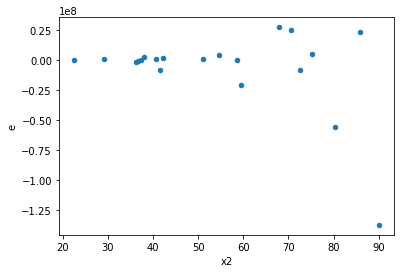

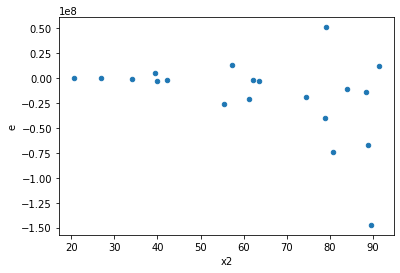

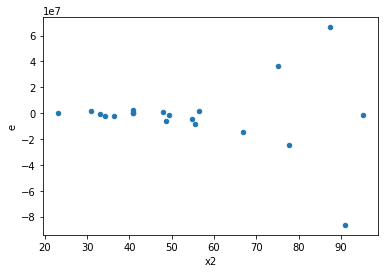

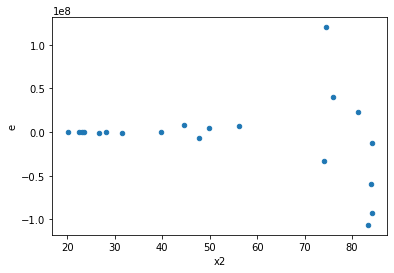

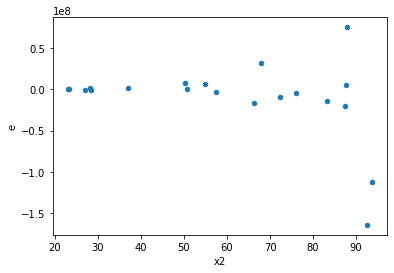

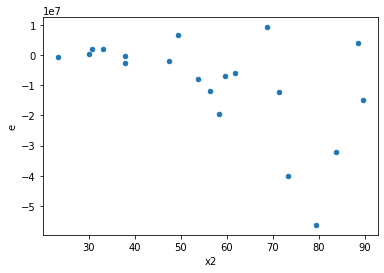

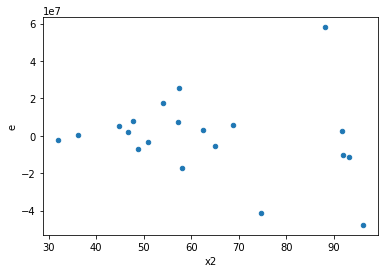

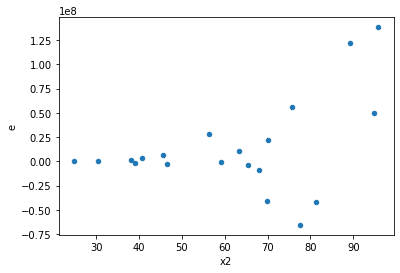

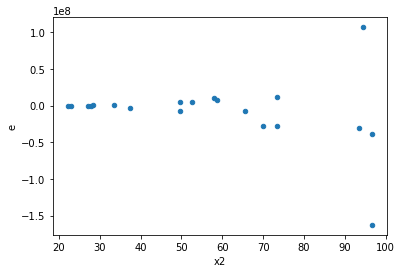

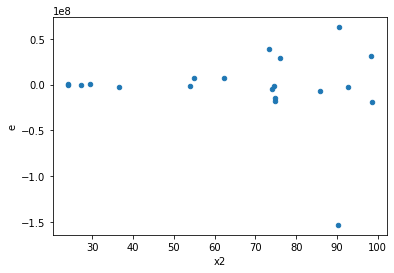

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,1.4441617124070134e+16,69386673056324.79,3610404281017533.5,17346668264081.197,208.13243362089318,1.7090183765278155e-05,0.9999914549081174,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,1.710848164335548e+16,686572139515177.9,4277120410838870.0,171643034878794.47,24.91869485912524,0.0030465107167976235,0.9984767446416012,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,8584113228313700.0,19274880018271.617,2146028307078425.0,4818720004567.904,445.3523560290073,2.5750814354186247e-06,0.9999987124592823,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,1.9874982085698944e+16,192566925937.9833,4968745521424736.0,48141731484.49583,103210.77718247283,3.1747937612180976e-12,0.9999999999984126,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,2.6372843596096364e+16,17674194959304.977,6593210899024091.0,4418548739826.244,1492.16661108583,1.2602202481559743e-07,0.9999999369889876,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,2115178779073501.0,45541023196211.93,528794694768375.25,11385255799052.982,46.445569963598004,0.000684953534692001,0.999657523232654,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,4134847428640431.0,157759589062576.25,1033711857160107.8,39439897265644.06,26.209800958598596,0.0027033136328611374,0.9986483431835694,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,1.6536300903503208e+16,373470046692119.8,4134075225875802.0,93367511673029.95,44.2774488877159,0.0007690751268047968,0.9996154624365976,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,2.5173809109633336e+16,13682906994473.215,6293452277408334.0,3420726748618.3037,1839.7997676810573,7.468951279676617e-08,0.9999999626552436,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,1.4441617124070134e+16,69386673056324.79,3610404281017533.5,17346668264081.197,208.13243362089318,1.7090183765278155e-05,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,1.710848164335548e+16,686572139515177.9,4277120410838870.0,171643034878794.47,24.91869485912524,0.0030465107167976235,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,8584113228313700.0,19274880018271.617,2146028307078425.0,4818720004567.904,445.3523560290073,2.5750814354186247e-06,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,1.9874982085698944e+16,192566925937.9833,4968745521424736.0,48141731484.49583,103210.77718247283,3.1747937612180976e-12,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,2.6372843596096364e+16,17674194959304.977,6593210899024091.0,4418548739826.244,1492.16661108583,1.2602202481559743e-07,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,2115178779073501.0,45541023196211.93,528794694768375.25,11385255799052.982,46.445569963598004,0.000684953534692001,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,4134847428640431.0,157759589062576.25,1033711857160107.8,39439897265644.06,26.209800958598596,0.0027033136328611374,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,1.6536300903503208e+16,373470046692119.8,4134075225875802.0,93367511673029.95,44.2774488877159,0.0007690751268047968,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,2.5173809109633336e+16,13682906994473.215,6293452277408334.0,3420726748618.3037,1839.7997676810573,7.468951279676617e-08,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    986
Reject005=1 : Homoscedasticity       14
Name: Result_test, dtype: int64